In [ ]:
%matplotlib notebook

In [ ]:
# loading standard modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, signal
from heapq import heappush, heappop
from skimage.color import rgb2grey
# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1 import Figure, LiveWirePresenter

In [ ]:
class BFS:
    white_color = 0
    gray_color  = 1
    black_color = 2

    def __init__(self, img):
        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]
        
        # tuple declaration
        shape = (num_cols,num_rows)
        
        # instance variables (initializing numpy arrays)
        self.colors = np.empty(shape, dtype=int)
        self.predec_xs = np.empty(shape, dtype=int)
        self.predec_ys = np.empty(shape, dtype=int)
        self.dist = np.empty(shape)
        self.dist[:,:] = np.inf
        self.paths_computed_ = False
        
        # build image-contrast weighted edge grid
        dx = np.array([[ 0.0, 0.0, 0.0],
                       [ 1.0, 0.0,-1.0],
                       [ 0.0, 0.0, 0.0]])

        dy = np.array([[ 0.0,-1.0, 0.0],
                       [ 0.0, 0.0, 0.0],
                       [ 0.0, 1.0, 0.0]])
        
        im_blurred = ndimage.gaussian_filter(img[:,:], sigma=1)
        im_dx = signal.convolve2d(im_blurred, dx, boundary='symm', mode='same')
        im_dy = signal.convolve2d(im_blurred, dy, boundary='symm', mode='same')
        
        self.weight_grid = np.sqrt(im_dx**2 + im_dy**2)
       
        self.weight_grid = 25/(1+self.weight_grid)
       
        # weightGrid values are converted to integers for simplicity
        self.weight_grid = self.weight_grid.astype(int)
        
        # 4-neighbors graph
        self.neighbor_xs = [0, 1,  0, -1]
        self.neighbor_ys = [1, 0, -1,  0]

        # 8-neighbors graph
        #self.neighbor_xs = [0, 1, 1,  1,  0, -1, -1, -1]
        #self.neighbor_ys = [1, 1, 0, -1, -1, -1,  0,  1]

    def paths_computed(self):
        return self.paths_computed_

    def compute_paths_starting_at(self, sx, sy):
        self.paths_computed_ = False
        
        num_rows = self.num_rows
        num_cols = self.num_cols

        colors = self.colors
        predec_xs = self.predec_xs
        predec_ys = self.predec_ys
        
        dist = self.dist
        dist[:,:] = np.inf
        
        weight_grid = self.weight_grid

        neighbor_xs = self.neighbor_xs
        neighbor_ys = self.neighbor_ys
        num_neighbors = len(neighbor_xs)

        colors.fill(BFS.white_color)
        #colors[sx,sy] = BFS.gray_color

        predec_xs[sx,sy] = sx
        predec_ys[sx,sy] = sy
        
        dist[sx,sy] = 0
        
        # setting up for BFS
        queue = []
        queue.append((sx,sy))
        
        heap = []
        heappush(heap, (0,sx,sy))
        
        while len(heap) != 0:
            distance,x,y = heappop(heap)
            
            if colors[x,y] == BFS.white_color:
                colors[x,y] == BFS.gray_color
                
                for k in xrange(num_neighbors):
                    nx = x + neighbor_xs[k]
                    ny = y + neighbor_ys[k]
                    
                    # for each valid neighbor
                    if 0 <= nx and nx < num_cols and 0 <= ny and ny < num_rows:
                        alt = dist[x,y] + weight_grid[ny,nx]
                        
                        if alt < dist[nx,ny]:
                            dist[nx,ny] = alt
                            predec_xs[nx,ny] = x
                            predec_ys[nx,ny] = y
                            if colors[nx,ny] == BFS.white_color:
                                heappush(heap, (alt, nx, ny))
                     
        self.paths_computed_ = True        

    def get_path_to(self, x, y):
        xs = []
        ys = []
        cost = self.dist[x,y]
        xs.append(x)
        ys.append(y)

        predec_xs = self.predec_xs
        predec_ys = self.predec_ys

        while predec_xs[x,y] != x or predec_ys[x,y] != y:
            x,y = predec_xs[x,y],predec_ys[x,y]
            xs.append(x)
            ys.append(y)
            cost += self.dist[x,y]
        
        return xs,ys        

In [ ]:
class MyLiveWire:
    def __init__(self, img):
        self.fig = Figure()
        self.alg = BFS(img)
        self.pres = LiveWirePresenter(img, self.alg)
        self.pres.connect_figure(self.fig)

    def run(self):
        self.fig.show()

<IPython.core.display.Javascript object>


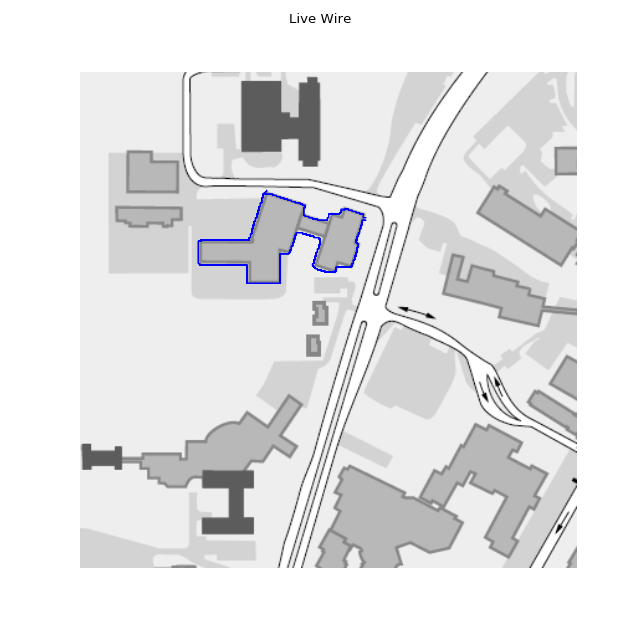

In [5]:
img = plt.imread('images\\uwocampus.bmp')
#img = rgb2grey(img)
app = MyLiveWire(img[:400,:400])
app.run()

In [ ]:
img = plt.imread('images\\test3.bmp')
#img = rgb2grey(img)
app = MyLiveWire(img[:100,:100])

#f = open('test.txt', 'w')
#print >>f, '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in app.alg.weight_grid])
#f.close()
print app.alg.weight_grid[21]
print app.alg.weight_grid[64,30]
print app.alg.weight_grid[65,86]
#print app.alg.weight_grid[84,86]
#print app.alg.weight_grid[85,86]
#print app.alg.dist
#app.alg.compute_paths_starting_at(0,0)
#print app.alg.get_path_cost(2, 68)
#print app.alg.dist[0]
#print app.alg.predec_xs[0]
#print app.alg.predec_ys[0]


In [ ]:
heap = []
heappush(heap, (2,6))
heappush(heap, (1,10))
heappush(heap, (10,0))
heappush(heap, (6,4))
heappush(heap, (2,4))
print heappop(heap)
print heappop(heap)
print heappop(heap)
print heappop(heap)